### 데이터 전처리
* 데이터 인코딩
    - scikit learn 은 string 은 받아들이지 않음
    - 카테고리화 및 숫자로 변환
    - LabelEncoder
    

In [3]:
# 라이브러리 불러오기
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [5]:
items=['세탁기','냉장고','TV']
myitem=['TV','냉장고','세탁기','TV','냉장고','냉장고']
# 인코더 설정
lencoder=LabelEncoder()
# 인코딩 학습
lencoder.fit(items)
# 인코딩 변환
labels=lencoder.transform(myitem)
cate=lencoder.classes_
# 분류모델 확인
print(lencoder.classes_,labels)
for label in labels:
    print(cate[label])
print('*'*30)
####### one hot encoding ############
lbls=lencoder.transform(items)

rlbls=lbls.reshape(-1,1)
print(lbls,'\n*********\n',rlbls)
oencoder=OneHotEncoder()
oencoder.fit(rlbls)
ritems=labels.reshape(-1,1)#1*8
onelbl=oencoder.transform(ritems)
onehotarr=onelbl.toarray()
onehotarr


['TV' '냉장고' '세탁기'] [0 1 2 0 1 1]
TV
냉장고
세탁기
TV
냉장고
냉장고
******************************
[2 1 0] 
*********
 [[2]
 [1]
 [0]]


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

### 원핫인코딩
* 1개만 1로 만드는 카테고리 분류 방식
* 카테고리별 확률기반 머신러닝에 유용


In [6]:
#pandas get_dummies 이용하는 방법

idf=pd.DataFrame({'item':['카메라','TV','TV','냉장고','TV']})
oidf=pd.get_dummies(idf)
oidf.index=['카메라','TV','TV','냉장고','TV']
oidf

,item_TV,item_냉장고,item_카메라
카메라,0,0,1
TV,1,0,0
TV,1,0,0
냉장고,0,1,0
TV,1,0,0


### 집값 모델의 예
- 집값=범죄율*w1+방의갯수*w2+고속도로접근성*w3+건물년수*w4
- 범죄율:0.003*1000=3
- 방의 갯수:4*1=4


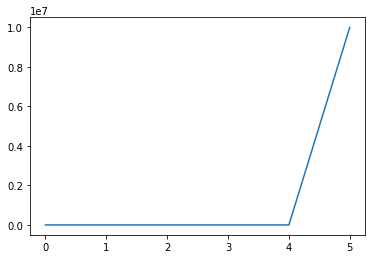

In [7]:
data=[1,2,3,4,5,10000000]
plt.plot(data)

[1e-07, 2e-07, 3e-07, 4e-07, 5e-07, 1.0]

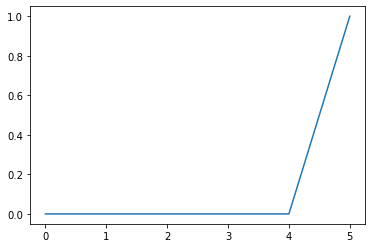

In [8]:
data=[1,2,3,4,5,10000000]
mxdata=[]
for d in data:
    mxdata.append(d/10000000)
plt.plot(mxdata)
mxdata

[0.0,
 0.30102999566398125,
 0.4771212547196626,
 0.6020599913279625,
 0.6989700043360187,
 7.0]

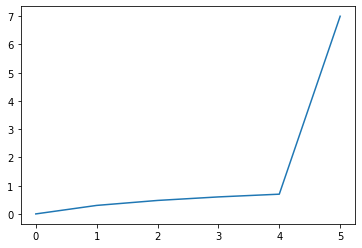

In [9]:
data=[1,2,3,4,5,10000000]
lgdata=[]
for d in data:
    lgdata.append(np.log10(d/10000000)+7)
plt.plot(lgdata)
lgdata

## 정규분포 중심극한정리中心極限定理
- Central Limit Theorem(CLT)
    - 표본의 크기가 커질수록 
    - 표본 평균의 분포는 모집단의 분포 모양과는 관계없이 
    - 정규분포에 가까워진다는 정리.
- 대수의 법칙:큰 수의 법칙(law of large numbers, LLN) 
    - 경험적 확률과 수학적 확률 사이의 관계를 나타내는 법칙으로, 
    - 표본집단의 크기가 커지면 (일반적>30)
    - 그 표본평균이 모평균에 가까워짐
- 정규화
    - 표준정규 분포화 하는것을 정규화
    * 표준 정규 분포(standard normal distribution) 화 하는것 
    - 확률통계에서 아주 중요한 역할

* 정규화의 목적
    - 서로 다른 정규분포 사이에 비교를 하거나 
    - 특정 정규분포를 토대로 하여 통계적 추정 등의 분석작업을 해야 할 때 
    - 필요에 따라 정규분포의 분산과 표준편차를 표준에 맞게 통일시키는 것
* 방법
    정규화 = (x-평균)/분산
    
    

In [1]:
# 라이브러리 불러오기
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
cols=['slen','swid','plen','pwid']
idf=pd.DataFrame(iris['data'],columns=cols)
idf['target']=iris['target']
idf.tail()

,slen,swid,plen,pwid,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [3]:
from sklearn.preprocessing import StandardScaler
# 스케일러 정의
scaler=StandardScaler()
#학습
scaler.fit(idf)
# 변환
st_iris=scaler.transform(idf)
st_idf=pd.DataFrame(st_iris)
st_idf

,0,1,2,3,4
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,1.224745
146,0.553333,-1.282963,0.705921,0.922303,1.224745
147,0.795669,-0.131979,0.819596,1.053935,1.224745
148,0.432165,0.788808,0.933271,1.448832,1.224745


* MinMaxScaler
    - 데이터를 등간격으로 0~1사이에 분포 스케일링 하는 방법


In [5]:
from  sklearn.preprocessing import MinMaxScaler
mscaler=MinMaxScaler()
mscaler.fit(idf)
m_iris=mscaler.transform(idf)
m_idf=pd.DataFrame(m_iris)
m_idf.tail()

,0,1,2,3,4
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0
149,0.444444,0.416667,0.694915,0.708333,1.0


* 스케일링시 주의사항
    - 반드시 트레이닝셋과 데이터셋이 동일 스케일링 모델을 따른다
        - 전체 스케일링후 테스트셋과 데이터셋으로 변환
        - 부득이한경우 fit 과 transform을 분리 사용하여 스케일링 기준을 맞춘다
    

* Standard Scaler : 특정한 정규분포를 가정하는 모델(회귀모델, 로지스틱 회귀모델...)
* Min-Max Scaler : 특정 분포를 가정하지 않는 모델(신경망, k-최근접이웃...)